In [2]:
# importing all the libraries
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',81)
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC , LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

In [3]:
train = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Train.xlsx')
test = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Data_Test.xlsx')
submission = pd.read_excel(r'F:\AAA Machine Learning\Macine Hack\Predict The Price of the Book\Participants_Data\Sample_Submission.xlsx')


In [4]:
print(train.shape)
print(test.shape)
print(submission.shape)

(6237, 9)
(1560, 8)
(1560, 1)


In [5]:
target = train['Price']
train = train.drop(['Price'],axis=1)

In [6]:
df = pd.concat([train,test],axis=0).reset_index(drop=True)

In [7]:
df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography"
...,...,...,...,...,...,...,...,...
7792,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media"
7793,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts"
7794,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour
7795,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7797 non-null   object
 1   Author        7797 non-null   object
 2   Edition       7797 non-null   object
 3   Reviews       7797 non-null   object
 4   Ratings       7797 non-null   object
 5   Synopsis      7797 non-null   object
 6   Genre         7797 non-null   object
 7   BookCategory  7797 non-null   object
dtypes: object(8)
memory usage: 487.4+ KB


In [9]:
df.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,7797,7797,7797,7797,7797,7797,7797,7797
unique,6787,4372,3882,36,368,6771,363,11
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure
freq,4,87,60,1751,1328,8,1183,1036


In [ ]:
len(df['Title'].unique())

6787

In [ ]:
df.shape

(7797, 8)

In [ ]:
df['Title'].value_counts()

Casino Royale: James Bond 007 (Vintage)                                                                         4
The Elements of Style                                                                                           4
Doing Justice: A Prosecutor’s Thoughts on Crime, Punishment and the Rule of Law                                 4
Innovators: How a Group of Inventors, Hackers, Geniuses and Geeks Created the Digital Revolution                4
Sidemen: The Book: The book you've been waiting for                                                             4
                                                                                                               ..
Practice Makes Perfect (Berkley Sensation)                                                                      1
The Last Ball Six                                                                                               1
Things I Want My Daughters to Know                                                      

In [ ]:
df['Author'].value_counts()

Agatha Christie       87
Ladybird              63
DK                    61
Albert Uderzo         48
Nora Roberts          40
                      ..
Steve Waugh            1
Desh Gaurav Sekhri     1
James Victore          1
Riyaz Tayyibji         1
Heinz Guderian         1
Name: Author, Length: 4372, dtype: int64

In [ ]:
df['Edition'].value_counts()

Paperback,– 5 Oct 2017                 60
Paperback,– 2016                       58
Paperback,– 2017                       47
Paperback,– 2019                       37
Paperback,– 2013                       35
                                       ..
Paperback,– May 2016                    1
Mass Market Paperback,– 29 Jul 2014     1
Paperback,– 5 Jun 2019                  1
Hardcover,– 18 Jan 2018                 1
Paperback,– 16 Sep 2016                 1
Name: Edition, Length: 3882, dtype: int64

In [ ]:
df['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Hardcover,– 11 Apr 2017',
       'Paperback,– 2 Jul 1999', 'Paperback,– 16 Sep 2016'], dtype=object)

In [ ]:
import re

In [ ]:
editionYear = []

for value in df['Edition']:
    year = re.findall('(\d{4})',value)
    
    if len(year)!=0:
        editionYear.append(year[0])
    else:
        editionYear.append('1997')
    

In [ ]:
type(editionYear)

list

In [ ]:
len(editionYear)

7797

In [ ]:
df['Edition_Year'] = editionYear

In [ ]:
df['Edition_Year'].value_counts()

2018    1018
2017     930
2016     835
2015     639
2014     503
2013     463
2019     457
2012     367
2011     356
2010     306
2009     234
2008     204
2005     165
2006     139
2007     131
2003     119
2004     108
2002      83
2000      83
2001      80
1997      76
1999      54
1995      41
1998      39
1996      39
1994      39
1992      38
1991      26
1993      26
1989      24
1986      18
1990      18
1984      18
1987      17
1988      15
1982      14
1985      12
1983      10
1976       9
1980       7
1971       5
1975       4
1960       3
1979       3
1977       3
1964       3
1974       3
1978       2
1981       2
1961       1
1942       1
1973       1
1925       1
1969       1
1900       1
1905       1
1970       1
1972       1
Name: Edition_Year, dtype: int64

In [ ]:
review = []

for value in df['Reviews']:
    rev = re.findall('(\d+\.\d+)',value)
    #print(rev)
    review.append(rev[0])

In [ ]:
df['Review_New'] = review

In [ ]:
df['Review_New'].value_counts()

5.0    1751
4.0     713
4.5     626
4.6     491
4.4     488
4.3     450
4.7     412
4.2     406
4.1     381
3.9     300
4.8     272
3.8     239
3.7     203
3.0     176
3.6     145
3.5     143
4.9      99
3.4      92
3.3      74
1.0      65
3.1      57
3.2      50
2.0      44
2.9      36
2.5      23
2.7      18
2.8      12
2.3       7
1.5       6
2.4       5
2.6       5
2.2       3
1.4       2
1.7       1
1.6       1
2.1       1
Name: Review_New, dtype: int64

In [ ]:
df['Ratings'].value_counts()

1 customer review         1328
2 customer reviews         886
3 customer reviews         613
4 customer reviews         444
5 customer reviews         379
                          ... 
1,227 customer reviews       1
337 customer reviews         1
973 customer reviews         1
310 customer reviews         1
531 customer reviews         1
Name: Ratings, Length: 368, dtype: int64

In [ ]:
rating = []

for value in df['Ratings']:
    rev = re.findall(r'\d+',value)
    out = [int(match.replace(',', '')) for match in re.findall('[\d,]+', value)]
    #print(out)
    rating.append(out[0])

In [ ]:
df['Ratings_New'] = rating

In [ ]:
df['Ratings_New'].value_counts()

1       1328
2        886
3        613
4        444
5        379
        ... 
1227       1
337        1
973        1
310        1
531        1
Name: Ratings_New, Length: 368, dtype: int64

In [ ]:
df['Synopsis'].value_counts()

A Tinkle Double Digest is two Tinkle Digests in one volume. These include the best stories of Tinkle over the years.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
for col in df['Genre'].value_counts():
    print(col)

1183
517
463
335
325
244
234
145
120
119
98
94
92
92
92
88
84
83
82
82
80
80
80
76
71
66
64
61
59
52
50
49
48
47
47
46
44
43
41
40
40
39
35
35
34
33
29
28
27
25
25
25
25
25
24
24
24
23
23
22
22
22
21
21
21
21
19
19
18
18
17
17
16
16
16
16
15
15
15
15
14
14
14
13
13
13
12
12
12
12
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
genre_dict= {}
for i,j in df['Genre'].value_counts().items():
        #print(i,j)
        print(j)
        
        if j>=90:
            genre_dict[i] = i
        else:
            genre_dict[i] = 'other'

1183
517
463
335
325
244
234
145
120
119
98
94
92
92
92
88
84
83
82
82
80
80
80
76
71
66
64
61
59
52
50
49
48
47
47
46
44
43
41
40
40
39
35
35
34
33
29
28
27
25
25
25
25
25
24
24
24
23
23
22
22
22
21
21
21
21
19
19
18
18
17
17
16
16
16
16
15
15
15
15
14
14
14
13
13
13
12
12
12
12
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
genre_dict

{'Action & Adventure (Books)': 'Action & Adventure (Books)',
 'Romance (Books)': 'Romance (Books)',
 'Biographies & Autobiographies (Books)': 'Biographies & Autobiographies (Books)',
 'Crime, Thriller & Mystery (Books)': 'Crime, Thriller & Mystery (Books)',
 'Contemporary Fiction (Books)': 'Contemporary Fiction (Books)',
 'Comics & Mangas (Books)': 'Comics & Mangas (Books)',
 'Mangas': 'Mangas',
 'Music Books': 'Music Books',
 'Design': 'Design',
 'Humour (Books)': 'Humour (Books)',
 'Dictionaries': 'Dictionaries',
 'Indian Writing (Books)': 'Indian Writing (Books)',
 'Cinema & Broadcast (Books)': 'Cinema & Broadcast (Books)',
 'Handicrafts, Decorative Arts & Crafts (Books)': 'Handicrafts, Decorative Arts & Crafts (Books)',
 'Arts History, Theory & Criticism (Books)': 'Arts History, Theory & Criticism (Books)',
 'Computer Science Books': 'other',
 'True Accounts (Books)': 'other',
 'Healthy Living & Wellness (Books)': 'other',
 'Government (Books)': 'other',
 'Writing Guides (Books)': 

In [ ]:
df['New_Genre'] = df['Genre'].map(genre_dict)

In [ ]:
df['New_Genre'].value_counts()

other                                            3644
Action & Adventure (Books)                       1183
Romance (Books)                                   517
Biographies & Autobiographies (Books)             463
Crime, Thriller & Mystery (Books)                 335
Contemporary Fiction (Books)                      325
Comics & Mangas (Books)                           244
Mangas                                            234
Music Books                                       145
Design                                            120
Humour (Books)                                    119
Dictionaries                                       98
Indian Writing (Books)                             94
Cinema & Broadcast (Books)                         92
Arts History, Theory & Criticism (Books)           92
Handicrafts, Decorative Arts & Crafts (Books)      92
Name: New_Genre, dtype: int64

In [ ]:
df['BookCategory'].value_counts()

Action & Adventure                      1036
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: BookCategory, dtype: int64

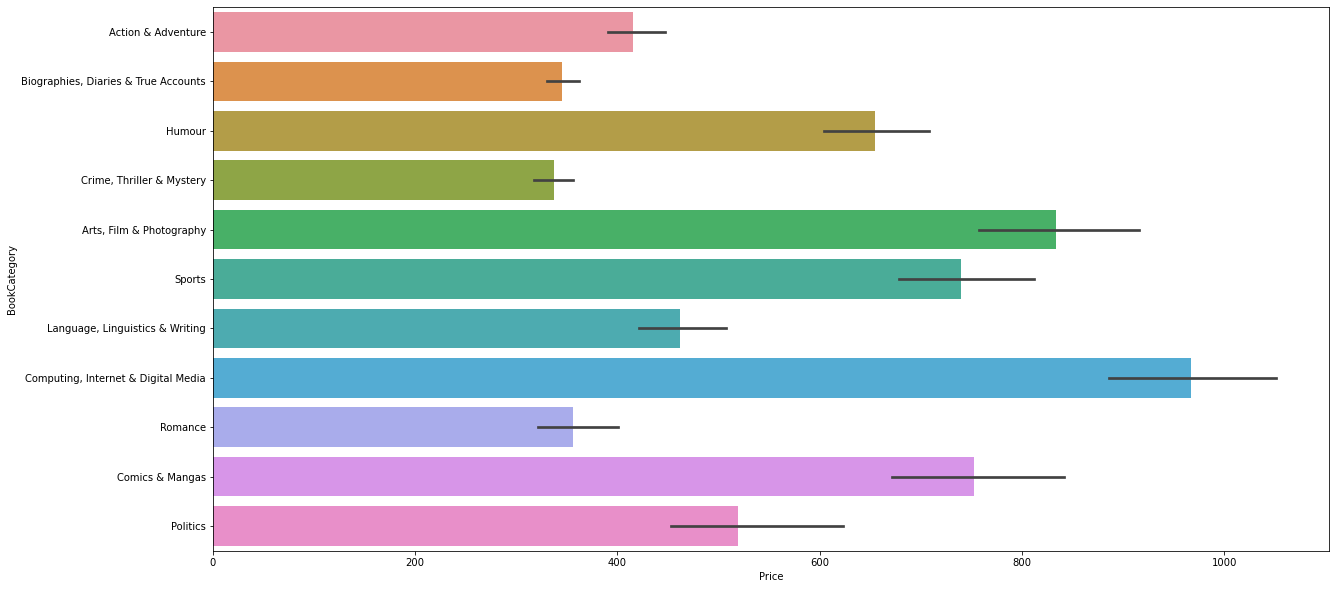

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['BookCategory'],x=target)
plt.show()

<AxesSubplot:>

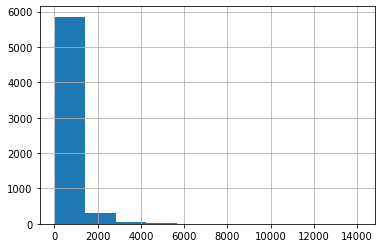

In [ ]:
target.hist()

In [ ]:
for i,j in df['Author'].value_counts().items():
    print(i,j)

Agatha Christie 87
Ladybird 63
DK 61
Albert Uderzo 48
Nora Roberts 40
Herge 40
James Patterson 39
Bill Watterson 36
John Grisham 34
Sidney Sheldon 33
P.G. Wodehouse 33
Clive Cussler 30
Sophie Kinsella 27
David Baldacci 26
Stephen King 26
Wilbur Smith 26
Danielle Steel 25
Lee Child 25
George R.R. Martin 23
Jeffrey Archer 22
Frederick Forsyth 21
Louis L'Amour 21
Oliver Bowden 20
Dreamland Publications 20
Matthew Reilly 19
Michael Crichton 19
Akira Toriyama 19
Ruskin Bond 18
Geronimo Stilton 17
René Goscinny, Albert Uderzo 17
Neil Gaiman 17
Various 16
Robert Ludlum 16
James Rollins 15
Oxford Dictionaries 15
Dan Brown 15
Ken Follett 15
Alistair MacLean 15
Novoneel Chakraborty 14
Haruki Murakami 14
J.K. Rowling 14
Daniel Silva 14
Jim Davis 14
Trinity College Lond 14
Ian Fleming 13
Kohei Horikoshi 13
Masashi Kishimoto 13
Luca Caioli 13
Dav Pilkey 13
Cecelia Ahern 12
Ernest Hemingway 12
Bill Bryson 12
Eiichiro Oda 12
Michael Connelly 12
National Geographic 12
Julia Donaldson 11
Anant Pai 11
C

Aravind Adiga 2
Cullen Bunn 2
Kausik Bandyopadhyay 2
Arthur Hailey 2
Soha Ali Khan 2
Julie Garwood 2
Jo Nesbo 2
Thich Nhat Hanh 2
Doris Kearns Goodwin 2
Urvashi Butalia 2
Anirudha Bhattacharjee 2
Pat Barker 2
Eric Matthes 2
Carol Marinelli 2
Jerry Pinto 2
Scott Mariani 2
Kentaro Miura 2
Bob Woodward 2
Catana Chetwynd 2
Rujuta Diwekar 2
Takashi Yano 2
Negi Haruba 2
France Belleville-Van Stone 2
J. D. Salinger 2
Subroto Bagchi 2
Amie Kaufman;Jay Kristoff 2
Victoria Jamieson 2
William Strunk Jr 2
Khushnuma Daruwala 2
Christopher Hitchens 2
Lisa Gardner 2
Rajiv Malhotra 2
Tom Sharpe 2
Jen Sincero 2
Ben Kane 2
Junichiro Tanizaki 2
One Direction 2
Michael Robotham 2
Shivshankar Menon Shivshankar Menon 2
Chandan Deshmukh 2
Stuart Diamond 2
Novy Kapadia 2
Andre Agassi 2
Comfort Love 2
Sanjeev Sanyal 2
Joe Baron 2
Edgar Allan Poe 2
Shraddha Singh, Bunny Mehra 2
Yoshihiro Togashi 2
Deepak Chopra M.D. 2
Curtis Frye 2
Greg Cox 2
Lawrence Anthony 2
Rainer Maria Rilke 2
William Strunk Jr. 2
Bishwesh

Peter Hiscock 1
Torre DeRoche 1
Saket 1
Aroup Chatterjee 1
Stella Gibbons 1
Richie Benaud 1
Nabeel Qureshi, Lee Strobel 1
Namrata Gupta 1
Srijan Pal Singh 1
Scott Meyers 1
Jamie Freveletti 1
PROSENJIT SAHA, ARUNDHATI SAHA 1
Kate Turabian 1
Simon Schama CBE 1
Ranjeev C Dubey 1
Ludwig Wittgenstein 1
Robert J. Woz 1
David D. Burns M.D. 1
Eriko Sato Ph.D. 1
Bhupen Patel 1
Minhaz Merchant 1
Dhan Gopal Mukerji 1
Janet Doman 1
Anton Pavlovich Chekhov 1
Monobina Gupta 1
N.S. Inamdar 1
John Gottman PhD, Nan Silver 1
Charles Bronson 1
John Fowles 1
Bill Chambers 1
Robert Cialdini Ph.D. 1
Joe Moran 1
Harry Thompson 1
Robert Gilmore 1
Bharat Karnad 1
Abhimanyu Singh Sisodia 1
Sonia Taneja 1
Anita Vachharajani 1
Donald E. Knuth 1
David Abram 1
Ved Mathur 1
Mike McGrath 1
R. Raj Rao 1
Prof. Satish Jain 1
Admiral S.M. Nanda 1
Maria Qamar 1
Lewis Helfand, Sankha Banerjee 1
Dennis O'Neil 1
Niharika Jindal 1
Charles Van Doren 1
Enid Blyton 1
Prannoy Roy 1
Jalaj Thanaki 1
Manish Kumar Jha 1
Celeste Headl

Joe Friel 1
David Liss 1
William C. Dietz 1
Brian Clegg 1
Ravish Bapna 1
Ben Hogan 1
Peter G. Northouse 1
Ved Nishad 1
Arulkumaran Kumaraswamipillai 1
Paul A. Ruggieri M.D. 1
T. Ramalingam Pillai 1
Syal 1
Deepali Srivastava, S. K. Srivastava 1
Jack Weatherford 1
Mahendra Jakhar 1
Das Jatindra Kumar 1
Sharma, R K 1
Scott Patterson 1
Kenneth Cukier 1
Carmen Bin Ladin 1
Dan Harris 1
Bill Browder 1
Garth Greenwell 1
Rick Smolan 1
John Lloyd 1
Andrew Timofeevich 1
Harsh Bothra 1
Jonathan Bresman 1
Prakash Iyer 1
S. W. Erdnase 1
Anna Milbourne 1
Kim Lawrence 1
LOUIS SAFIAN 1
Kerstin Gier 1
Ralph Corrigan 1
Vineet Bajpai 1
Bill Frindall 1
Usha Narayanan 1
Susan J. Fowler 1
Deepika Mahalakshmi 1
Val McDermid 1
Mary Lynn Bracht 1
Ken Spillman 1
A. Revathi, V. Geetha 1
Sarah Cooper 1
Tarun J. Tejpal 1
Manisha Koirala 1
Thorpe 1
Nick Bilton 1
Cara Hunter 1
A.J. Thomson 1
Jean Larteguy, Xan Fielding, Robert D. Kaplan 1
Tucker Max 1
Men's Health Magazine 1
Ana Victoria Calderon 1
Aditya Iyengar 1
R

Stephen R. Covey 1
Navin Kumar Manaswi 1
Jeremy Butterfield 1
Leslie Kaminoff 1
Robin Sloan 1
Lilian Carmine 1
Sally Rooney 1
Monica Ali 1
Andrew Downie 1
Nicholas Abercrombie 1
D.S. Paul 1
Kaaren Pixton 1
Tara Guber, Leah Kalish, Sophie Fatus, Baron Baptiste 1
Pitman 1
Sidney Poitier 1
Bansal/Goel/Sharma 1
Ellen Lupton 1
Guy Frederick 1
Tanenbaum 1
Ernestine Gilbreth Carey 1
Darrel L. Graham 1
Samuel Bjork 1
Seymour A. Papert 1
Yadvinder Singh Sandhu 1
Garima Kushwaha 1
Jeeva Jose 1
Sharif D. Rangnekar 1
Amanda Palmer 1
0, Butterfield, Ngondi, Kerr 1
Sunita Narain 1
Timothy Snyder 1
Avirook Sen 1
Cathy Maxwell 1
Kieron Moore, Rajesh Nagulakonda 1
Greta Thunberg 1
Dalton Trumbo 1
Barry Johnston 1
Robin Banerjee 1
Michael Sikorski 1
Bhasha Singh, Reenu Talwar 1
Harinder Sikka 1
Dot Barlowe 1
Wirth N 1
Charles Allen 1
Pam Jenoff 1
Pooja Rana 1
Francis Crick 1
Bachi J. Karkaria 1
Tim Wu 1
Shruti 1
Jennifer Stinson 1
Guy Kawasaki 1
Aijaz Ashraf Wani 1
Ajit Mookerjee 1
0, Rennie, Law 1
Glen

In [ ]:
df['Title'].value_counts()

Casino Royale: James Bond 007 (Vintage)                                                                         4
The Elements of Style                                                                                           4
Doing Justice: A Prosecutor’s Thoughts on Crime, Punishment and the Rule of Law                                 4
Innovators: How a Group of Inventors, Hackers, Geniuses and Geeks Created the Digital Revolution                4
Sidemen: The Book: The book you've been waiting for                                                             4
                                                                                                               ..
Practice Makes Perfect (Berkley Sensation)                                                                      1
The Last Ball Six                                                                                               1
Things I Want My Daughters to Know                                                      

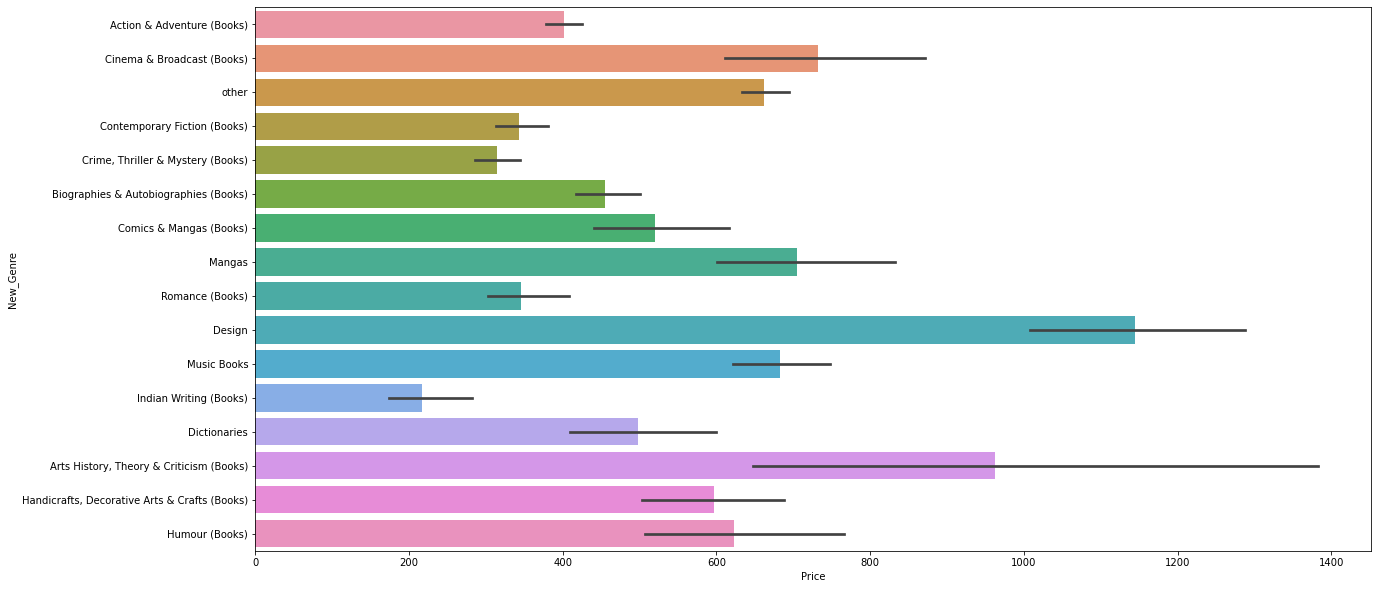

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['New_Genre'],x=target)
plt.show()

In [ ]:
#df = df.drop('Title',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

label = LabelEncoder()
ohe = OneHotEncoder()

df['Title_Labeled'] = label.fit_transform(df['Title'])


In [ ]:
df['Author_Labeled'] = label.fit_transform(df['Author'])

In [ ]:
#df['New_Genre_Labeled'] = ohe.fit_transform(df['New_Genre'])
#df['BookCategory_Labeled'] = ohe.fit_transform(df['BookCategory'])
df = pd.get_dummies(df, columns = ['New_Genre','BookCategory'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 39 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Title                                                    7797 non-null   object
 1   Author                                                   7797 non-null   object
 2   Edition                                                  7797 non-null   object
 3   Reviews                                                  7797 non-null   object
 4   Ratings                                                  7797 non-null   object
 5   Synopsis                                                 7797 non-null   object
 6   Genre                                                    7797 non-null   object
 7   Edition_Year                                             7797 non-null   object
 8   Review_New                            

In [ ]:
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,Edition_Year,Review_New,Ratings_New,Title_Labeled,Author_Labeled,New_Genre_Action & Adventure (Books),"New_Genre_Arts History, Theory & Criticism (Books)",New_Genre_Biographies & Autobiographies (Books),New_Genre_Cinema & Broadcast (Books),New_Genre_Comics & Mangas (Books),New_Genre_Contemporary Fiction (Books),"New_Genre_Crime, Thriller & Mystery (Books)",New_Genre_Design,New_Genre_Dictionaries,"New_Genre_Handicrafts, Decorative Arts & Crafts (Books)",New_Genre_Humour (Books),New_Genre_Indian Writing (Books),New_Genre_Mangas,New_Genre_Music Books,New_Genre_Romance (Books),New_Genre_other,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),2016,4.0,8,5803,748,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),2012,3.9,14,2120,370,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,1982,4.8,6,2982,4045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),2017,4.1,13,189,79,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,2006,5.0,1,2853,1138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre'],axis=1)

In [ ]:
df.head()

,Edition_Year,Review_New,Ratings_New,Title_Labeled,Author_Labeled,New_Genre_Action & Adventure (Books),"New_Genre_Arts History, Theory & Criticism (Books)",New_Genre_Biographies & Autobiographies (Books),New_Genre_Cinema & Broadcast (Books),New_Genre_Comics & Mangas (Books),New_Genre_Contemporary Fiction (Books),"New_Genre_Crime, Thriller & Mystery (Books)",New_Genre_Design,New_Genre_Dictionaries,"New_Genre_Handicrafts, Decorative Arts & Crafts (Books)",New_Genre_Humour (Books),New_Genre_Indian Writing (Books),New_Genre_Mangas,New_Genre_Music Books,New_Genre_Romance (Books),New_Genre_other,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,2016,4.0,8,5803,748,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2012,3.9,14,2120,370,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1982,4.8,6,2982,4045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2017,4.1,13,189,79,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2006,5.0,1,2853,1138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['Edition_Year', 'Review_New', 'Ratings_New', 'Title_Labeled',
       'Author_Labeled', 'New_Genre_Action & Adventure (Books)',
       'New_Genre_Arts History, Theory & Criticism (Books)',
       'New_Genre_Biographies & Autobiographies (Books)',
       'New_Genre_Cinema & Broadcast (Books)',
       'New_Genre_Comics & Mangas (Books)',
       'New_Genre_Contemporary Fiction (Books)',
       'New_Genre_Crime, Thriller & Mystery (Books)', 'New_Genre_Design',
       'New_Genre_Dictionaries',
       'New_Genre_Handicrafts, Decorative Arts & Crafts (Books)',
       'New_Genre_Humour (Books)', 'New_Genre_Indian Writing (Books)',
       'New_Genre_Mangas', 'New_Genre_Music Books',
       'New_Genre_Romance (Books)', 'New_Genre_other',
       'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Edition_Year                                             7797 non-null   object
 1   Review_New                                               7797 non-null   object
 2   Ratings_New                                              7797 non-null   int64 
 3   Title_Labeled                                            7797 non-null   int32 
 4   Author_Labeled                                           7797 non-null   int32 
 5   New_Genre_Action & Adventure (Books)                     7797 non-null   uint8 
 6   New_Genre_Arts History, Theory & Criticism (Books)       7797 non-null   uint8 
 7   New_Genre_Biographies & Autobiographies (Books)          7797 non-null   uint8 
 8   New_Genre_Cinema & Broadcast (Books)  

In [ ]:
df['Edition_Year'] = pd.to_numeric(df['Edition_Year'])
df['Review_New'] = pd.to_numeric(df['Review_New'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Edition_Year                                             7797 non-null   int64  
 1   Review_New                                               7797 non-null   float64
 2   Ratings_New                                              7797 non-null   int64  
 3   Title_Labeled                                            7797 non-null   int32  
 4   Author_Labeled                                           7797 non-null   int32  
 5   New_Genre_Action & Adventure (Books)                     7797 non-null   uint8  
 6   New_Genre_Arts History, Theory & Criticism (Books)       7797 non-null   uint8  
 7   New_Genre_Biographies & Autobiographies (Books)          7797 non-null   uint8  
 8   New_Genre_Cinema & Broadcast

In [ ]:
df.head()

,Edition_Year,Review_New,Ratings_New,Title_Labeled,Author_Labeled,New_Genre_Action & Adventure (Books),"New_Genre_Arts History, Theory & Criticism (Books)",New_Genre_Biographies & Autobiographies (Books),New_Genre_Cinema & Broadcast (Books),New_Genre_Comics & Mangas (Books),New_Genre_Contemporary Fiction (Books),"New_Genre_Crime, Thriller & Mystery (Books)",New_Genre_Design,New_Genre_Dictionaries,"New_Genre_Handicrafts, Decorative Arts & Crafts (Books)",New_Genre_Humour (Books),New_Genre_Indian Writing (Books),New_Genre_Mangas,New_Genre_Music Books,New_Genre_Romance (Books),New_Genre_other,BookCategory_Action & Adventure,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,2016,4.0,8,5803,748,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2012,3.9,14,2120,370,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1982,4.8,6,2982,4045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2017,4.1,13,189,79,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2006,5.0,1,2853,1138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(7797, 32)

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)


In [ ]:
df = pd.DataFrame(df,columns=df.columns)

In [ ]:
#df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
y = target
train_final = df.loc[:6236, :].copy()
test_final = df.loc[6236 + 1:, :].reset_index(drop=True).copy()


In [ ]:
print(y.shape)
print(train_final.shape)
print(test_final.shape)

(6237,)
(6237, 32)
(1560, 32)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_final,y,test_size=0.2,random_state=42)

In [ ]:
X_train.isnull().sum()

Edition_Year                                               0
Review_New                                                 0
Ratings_New                                                0
Title_Labeled                                              0
Author_Labeled                                             0
New_Genre_Action & Adventure (Books)                       0
New_Genre_Arts History, Theory & Criticism (Books)         0
New_Genre_Biographies & Autobiographies (Books)            0
New_Genre_Cinema & Broadcast (Books)                       0
New_Genre_Comics & Mangas (Books)                          0
New_Genre_Contemporary Fiction (Books)                     0
New_Genre_Crime, Thriller & Mystery (Books)                0
New_Genre_Design                                           0
New_Genre_Dictionaries                                     0
New_Genre_Handicrafts, Decorative Arts & Crafts (Books)    0
New_Genre_Humour (Books)                                   0
New_Genre_Indian Writing

In [ ]:
# # using LGBM Regressor

# lgbm = LGBMRegressor()

# lgbm.fit(X_train,y_train)


In [ ]:
#lgbm_predict = lgbm.predict(X_test)

In [ ]:
# for i in lgbm_predict:
#     if i<0:
#         print('yes')
#         print(i)
#         lgbm_predict[i] = i*-1
        

In [ ]:
# print(metrics.r2_score(y_test, lgbm_predict))
# print(metrics.mean_squared_log_error(y_test, lgbm_predict))

In [ ]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
model = CatBoostRegressor()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01,0.05,0.1],
              'iterations'    : [30,50,100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)


    
                                                                                                                                                                                                                                                                  

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
cat_best_params = {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}

models = [CatBoostRegressor(**cat_best_params)]


for model in models:
    print(model)
    mod = model
    mod.fit(train_final,target)
     #result = mod.predict(X_test)
    sub = mod.predict(test_final)
    print(sub)
    output = pd.concat([pd.Series(sub , name = 'Price')],axis = 1)
    output.to_csv('F:\Machine Learning\Macine Hack\Predict The Price of the Book\Submission\Cat2_submission.csv',index=False)
#     print(mean_squared_error(y_test, res))
#     print(mean_squared_error(y_test, res,squared=False))
#     r2 = r2_score(y_test, res)
#     print(r2)
    

0:	learn: 681.8253085	total: 17.5ms	remaining: 1.73s
1:	learn: 672.2536134	total: 34.8ms	remaining: 1.71s
2:	learn: 663.6035897	total: 69.4ms	remaining: 2.25s
3:	learn: 657.3117985	total: 91.4ms	remaining: 2.19s
4:	learn: 650.6347050	total: 111ms	remaining: 2.1s
5:	learn: 646.5528434	total: 133ms	remaining: 2.08s
6:	learn: 641.4245514	total: 154ms	remaining: 2.05s
7:	learn: 635.7528718	total: 174ms	remaining: 2s
8:	learn: 631.7123156	total: 196ms	remaining: 1.99s
9:	learn: 628.4714562	total: 214ms	remaining: 1.93s
10:	learn: 623.9387428	total: 233ms	remaining: 1.88s
11:	learn: 619.8687677	total: 250ms	remaining: 1.83s
12:	learn: 616.8467027	total: 270ms	remaining: 1.81s
13:	learn: 612.9069174	total: 288ms	remaining: 1.77s
14:	learn: 610.4095603	total: 306ms	remaining: 1.73s
15:	learn: 608.8690876	total: 322ms	remaining: 1.69s
16:	learn: 607.2960781	total: 344ms	remaining: 1.68s
17:	learn: 605.1950661	total: 363ms	remaining: 1.65s
18:	learn: 603.2887713	total: 380ms	remaining: 1.62s
19:

In [ ]:
for i in output['Price']:
    if i<0:
        print(i)